In [1]:
from tensorflow.keras.models import load_model
import h5py
import numpy as np
from ztfrapid import ztf_rapid
from glob import glob
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
files = np.load('/home/nmiranda/workspace/ztf_rapid/data/processed/test_01.npz')

In [3]:
X_test = files['X_test']

In [4]:
model_filepaths = glob('/home/nmiranda/workspace/ztf_rapid/models/test_*.hdf5')

In [5]:
model_filepaths

['/home/nmiranda/workspace/ztf_rapid/models/test_02.hdf5',
 '/home/nmiranda/workspace/ztf_rapid/models/test_04.hdf5',
 '/home/nmiranda/workspace/ztf_rapid/models/test_01.hdf5',
 '/home/nmiranda/workspace/ztf_rapid/models/test_03.hdf5']

In [6]:
models = [load_model(path) for path in model_filepaths]

In [7]:
y_pred_list = [ztf_rapid.predict(model, X_test) for model in models]

In [8]:
y_true, y_pred = ztf_rapid.true_pred_ensemble(files['y_test'], y_pred_list, files['objids_test'], files['class_names'], cutoff=0.75)

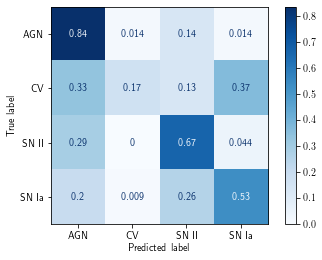

In [9]:
ztf_rapid.plot_confusion_matrix(y_true, y_pred, files['class_names'])

In [10]:
files = np.load('/home/nmiranda/workspace/ztf_rapid/data/processed/test_under/test_under_01.npz')
model_filepaths = glob('/home/nmiranda/workspace/ztf_rapid/models/test_under/test_under_*')

models = [load_model(path) for path in model_filepaths]
y_pred_list = [ztf_rapid.predict(model, X_test) for model in models]
y_true, y_pred = ztf_rapid.true_pred_ensemble(files['y_test'], y_pred_list, files['objids_test'], files['class_names'], cutoff=0.75)


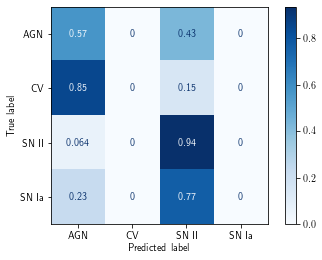

In [11]:
ztf_rapid.plot_confusion_matrix(y_true, y_pred, files['class_names'])

In [29]:
from sklearn.preprocessing import MinMaxScaler

orig_dims = X_test.shape
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_test.reshape((orig_dims[0],-1))).reshape(orig_dims)
X_train_normalized

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [26]:
orig_dims = X_test.shape
orig_dims

(1616, 150, 3)

In [20]:
X_test.reshape((X_test.shape[0],-1)).shape

(1616, 450)

In [24]:
X_test.reshape((X_test.shape[0],-1)).reshape((X_test.shape[0],-1,3))

array([[[  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]],

       ...,

      